# COMPONENT TWO: Sales Performance of Video Games

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-games-sales-dataset-2022-updated-extra-feat/Video_Games.csv


#### Dataset Importation

In [2]:

#Data importation
sales = pd.read_csv("/kaggle/input/video-games-sales-dataset-2022-updated-extra-feat/Video_Games.csv")

In [3]:
sales.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sales.shape

(16719, 16)

In [5]:
#Checking for missing data

sales.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
# Checking the unique count 

sales.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [7]:
#checking duplicate
duplicates = sales.duplicated()

print("\nDuplicated rows:")
print(duplicates.sum())



Duplicated rows:
0


No dublicate in the dataset

## Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
sale = sales.copy() # Creating a copy of the data

In [10]:
sale.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

Text(0, 0.5, 'Count')

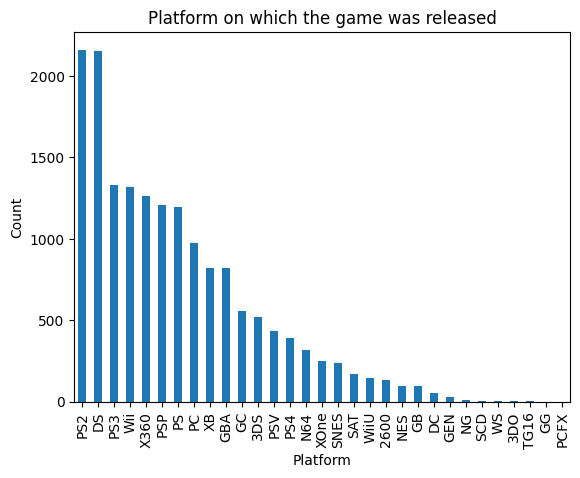

In [11]:
sale.Platform.value_counts().plot(kind="bar")
plt.title("Platform on which the game was released")
plt.ylabel("Count")

PS2 released the highest numbers of games

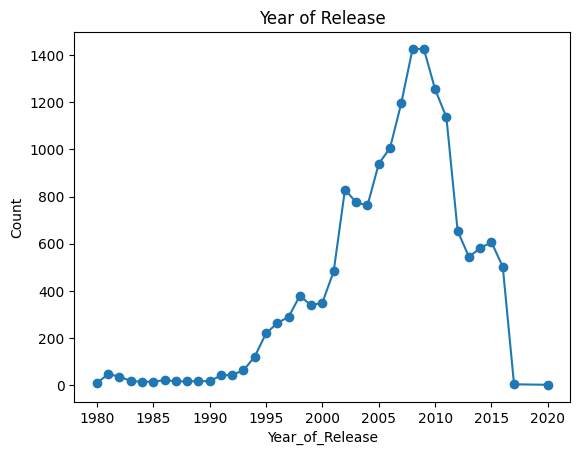

In [12]:
sale['Year_of_Release'].fillna(float('nan')).astype('Int64').value_counts().sort_index().plot(kind="line", marker="o", linestyle="-")
plt.title("Year of Release")
plt.ylabel("Count")
plt.show()

The highest number of games were realsed in 2008 and 2009.

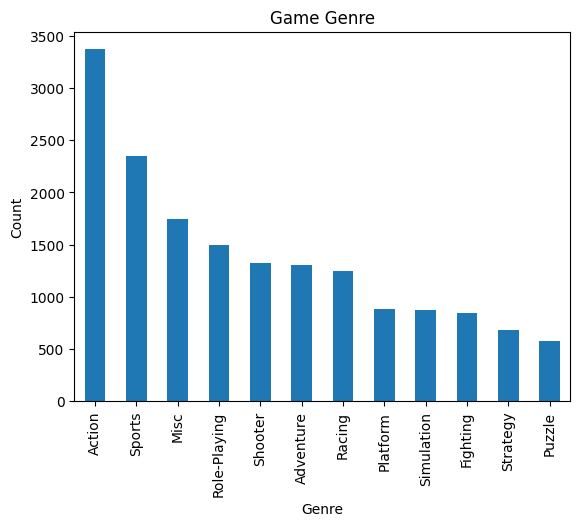

In [13]:
sale["Genre"].value_counts().plot(kind="bar")
plt.title("Game Genre")
plt.ylabel("Count")
plt.show()

Action games were the highest game genre released over the years.

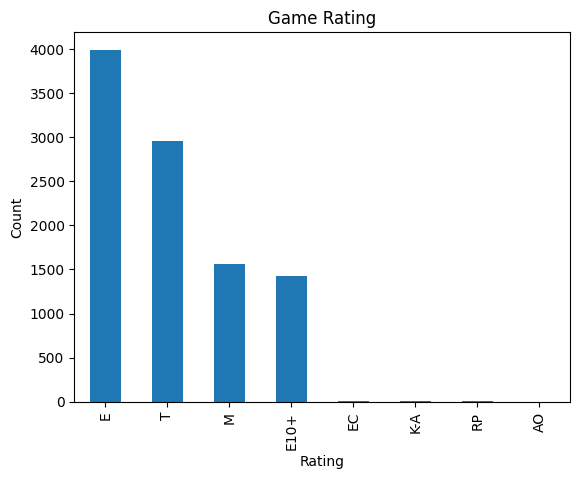

In [14]:
sale["Rating"].value_counts().plot(kind="bar")
plt.title("Game Rating")
plt.ylabel("Count")
plt.show()

In [15]:
sale["Rating"].value_counts()

Rating
E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

we will drop the EC, K-A, RP, AO

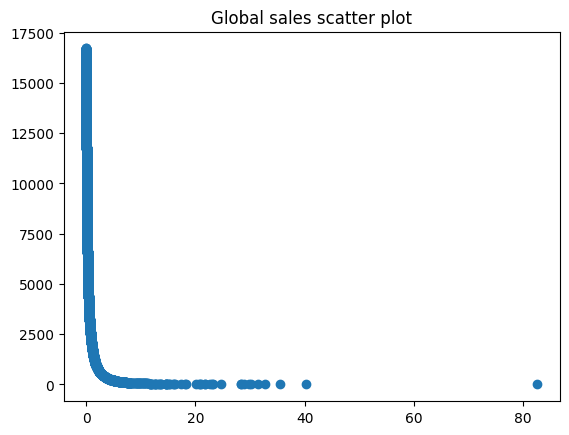

In [16]:
plt.scatter(sale.Global_Sales,[i for i in range(len(sale.Global_Sales))])
plt.title("Global sales scatter plot")
plt.show()

It can be seen there is outliers in the dataset which will be replaced or dropped.

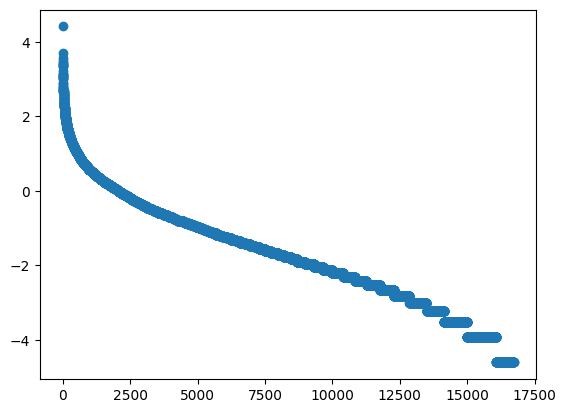

In [17]:
plt.scatter([i for i in range(len(sale.Global_Sales))],np.log(sale.Global_Sales))
plt.show()

### Data Cleaning

Some of the data cleaning that was done:

1. I dropped all the years below 2000.
2. Also, I dropped the 4 rating with low occurance.
3. All, the platform with less than 500 count.

In [18]:
sale.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [19]:
plat_drop = ['Wii','DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS', 'XB', 'PC', 'PSP']
sale = sale[sale['Platform'].isin(plat_drop)]

In [20]:
rat = ['EC', 'K-A', 'RP', 'AO']
sale = sale[~sale['Rating'].isin(rat)]

In [21]:
sale = sale[sale['Year_of_Release']> 2000]

In [22]:
sale.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher            30
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       5305
Critic_Count       5305
User_Score         3626
User_Count         5762
Developer          3591
Rating             3683
dtype: int64

In [23]:
sale_drop = sale.dropna(subset=['Developer'])

#Let's see the shape of the data again
print(sale_drop.shape)

#Lets see the missing ratios again
data_na = (sale_drop.isnull().sum() / len(sale_drop)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(8219, 16)


,Missing Ratio
User_Count,26.548242
Critic_Score,20.927120
Critic_Count,20.927120
Rating,1.119358
User_Score,0.815184
Publisher,0.036501


In [24]:
sale_drop.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             3
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1720
Critic_Count       1720
User_Score           67
User_Count         2182
Developer             0
Rating               92
dtype: int64

In [25]:
#Dealing with missing value

sale_drop['Publisher'] = sale_drop['Publisher'].fillna(sale_drop['Publisher'].mode()[0])

sale_drop['Rating'] = sale_drop['Rating'].fillna(sale_drop['Rating'].mode()[0])


sale_drop['User_Score'] = sale_drop['User_Score'].replace('tbd', None)

#Now we can handle the N/A's appropriately
sale_drop['User_Score'] = sale_drop['User_Score'].fillna(sale_drop['User_Score'].median())

sale_drop['User_Count'] = sale_drop['User_Count'].fillna(sale_drop['User_Count'].median())

sale_drop['Critic_Score'] = sale_drop['Critic_Score'].fillna(sale_drop['Critic_Score'].median())
sale_drop['Critic_Count'] = sale_drop['Critic_Count'].fillna(sale_drop['Critic_Count'].median())

/tmp/ipykernel_28/985983473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_drop['Publisher'] = sale_drop['Publisher'].fillna(sale_drop['Publisher'].mode()[0])
/tmp/ipykernel_28/985983473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_drop['Rating'] = sale_drop['Rating'].fillna(sale_drop['Rating'].mode()[0])
/tmp/ipykernel_28/985983473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [26]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
sale_drop['Platform'] = label_encoder.fit_transform(sale_drop['Platform'])
sale_drop['Year_of_Release'] = label_encoder.fit_transform(sale_drop['Year_of_Release'])
sale_drop['Genre'] = label_encoder.fit_transform(sale_drop['Genre'])
sale_drop['Publisher'] = label_encoder.fit_transform(sale_drop['Publisher'])
sale_drop['Developer'] = label_encoder.fit_transform(sale_drop['Developer'])
sale_drop['Rating'] = label_encoder.fit_transform(sale_drop['Rating'])

/tmp/ipykernel_28/1258218908.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_drop['Platform'] = label_encoder.fit_transform(sale_drop['Platform'])
/tmp/ipykernel_28/1258218908.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_drop['Year_of_Release'] = label_encoder.fit_transform(sale_drop['Year_of_Release'])
/tmp/ipykernel_28/1258218908.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [27]:
sale_drop.drop(columns = ["Name"], inplace = True)

/tmp/ipykernel_28/3166858457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_drop.drop(columns = ["Name"], inplace = True)


In [28]:
sale_drop.reset_index(drop = True, inplace = True)

In [29]:
sale_drop.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,7,5,10,182,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,946,0
1,7,7,6,182,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,946,0
2,7,8,10,182,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,946,0
3,0,5,4,182,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,946,0
4,7,5,3,182,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,946,0


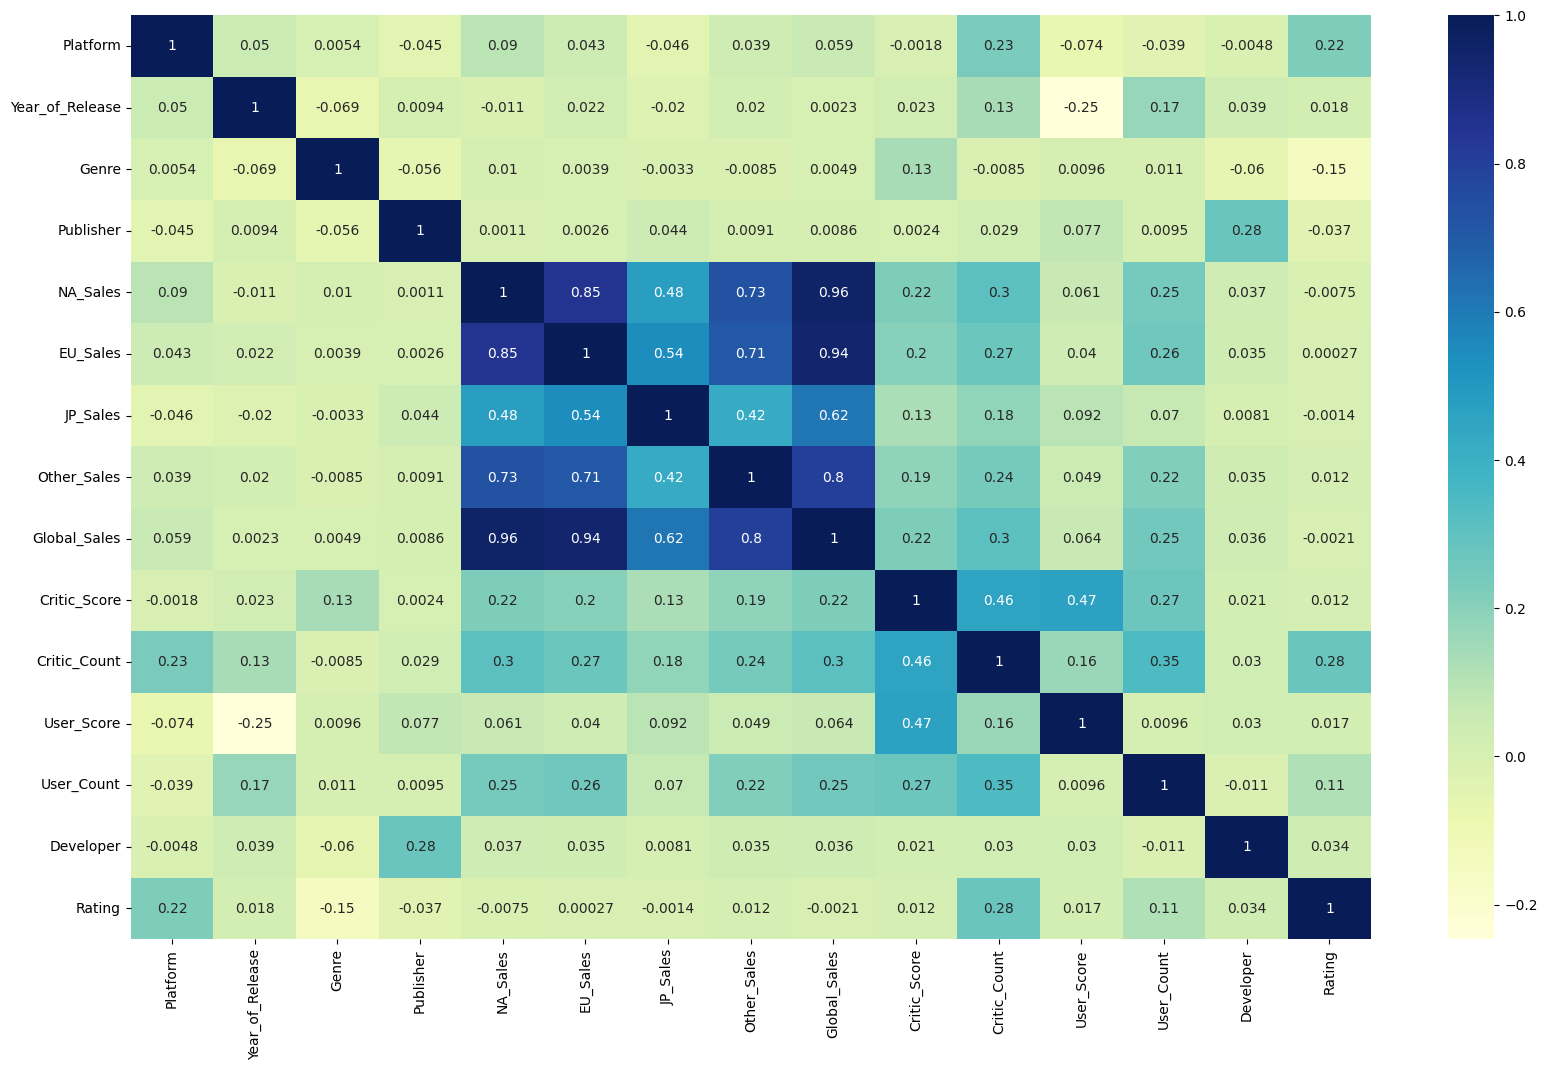

In [30]:
plt.subplots(figsize= (20,12))
dataplot = sns.heatmap(sale_drop.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

High correlation among the sales variables

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

In [32]:
sale_drop.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [33]:
sale_dro = sale_drop[['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Global_Sales', 'Critic_Score','Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']]
sale_drop1 = sale_drop[[
       'Critic_Count', 'User_Count', "Global_Sales"]] #'Developer', 'Year_of_Release','Platform','Critic_Score',

In [34]:
target = sale_drop1["Global_Sales"]
features = sale_drop1.drop(columns = ["Global_Sales"])

In [35]:
target = sale_dro["Global_Sales"]
features = sale_dro.drop(columns = ["Global_Sales"])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size= 0.2, random_state = 42, shuffle = True)

In [37]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform your test data using the same scaler
X_test_scaled = scaler.transform(X_test)


### Modelling

# Question 1

In [41]:
from sklearn.linear_model import LinearRegression
# Linear Regression model traning
model = LinearRegression()

model.fit(X_train_scaled , y_train)


#predictions on the test data
predictions = model.predict(X_test_scaled)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

print("Linear Regression model 1")
print("R-squared (R²) Score:", r2)
print("Mean Squared Error (MSE):", np.sqrt(mse))

Linear Regression model 1
R-squared (R²) Score: 0.27733025483527385
Mean Squared Error (MSE): 1.037927042580144


In [47]:
#Random forest
from sklearn.ensemble import RandomForestRegressor


#Random Forest Regressor
model = RandomForestRegressor(n_estimators=150)
model.fit(X_train_scaled, y_train)

#predictions on the test data
predictions = model.predict(X_test_scaled)

#R-squared (R²) score
r2 = r2_score(y_test, predictions)

#Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

print("Random Forest Regressor 1")
print("R-squared (R²) Score:", r2)
print("Mean Squared Error (RMSE):", np.sqrt(mse))

Random Forest Regressor 1
R-squared (R²) Score: 0.4787325060643517
Mean Squared Error (RMSE): 0.8815099372198427


In [48]:
model.feature_importances_

array([0.08012135, 0.07041703, 0.051853  , 0.04317681, 0.17684193,
       0.134754  , 0.04511714, 0.25729347, 0.06588675, 0.07453852])

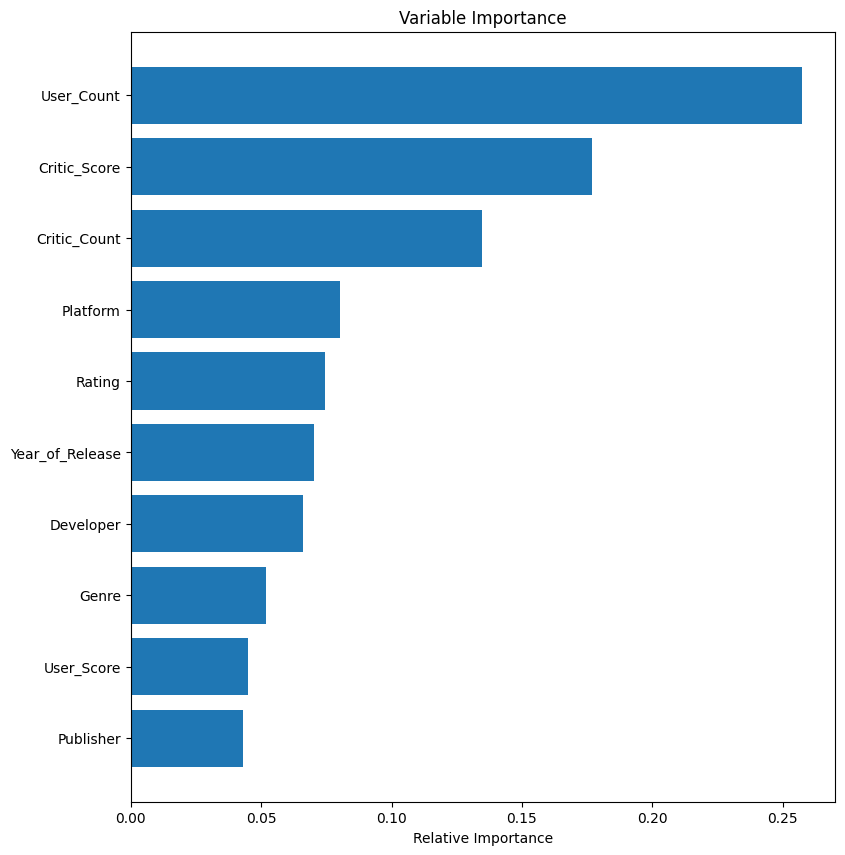

In [49]:
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns.values[sorted_idx]) #Not 100 % sure the feature names match the importances correctly...
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Question 2

In [50]:
sale_drop.head()

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,7,5,10,182,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,946,0
1,7,7,6,182,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,946,0
2,7,8,10,182,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,946,0
3,0,5,4,182,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,946,0
4,7,5,3,182,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,946,0


In [51]:
col = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']


col1 = ['Critic_Score','Critic_Count', 'User_Score', 'User_Count']

In [52]:
data2 = sale_drop[col1]
data2.head()

,Critic_Score,Critic_Count,User_Score,User_Count
0,76.0,51.0,8,322.0
1,82.0,73.0,8.3,709.0
2,80.0,73.0,8,192.0
3,89.0,65.0,8.5,431.0
4,58.0,41.0,6.6,129.0


#### North America sales

In [53]:
NA = sale_drop['NA_Sales']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data2,NA,test_size= 0.2, random_state = 42, shuffle = True)
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform your test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [61]:
# Linear Regression model traning
model = RandomForestRegressor(n_estimators=150)

model.fit(X_train_scaled , y_train)


#predictions on the test data
predictions = model.predict(X_test_scaled)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)


print("R-squared (R²) Score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) Score: 0.2704102835949612
Mean Squared Error (MSE): 0.2661986885849382


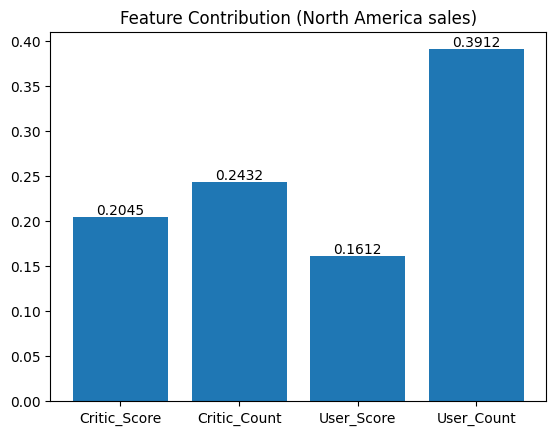

In [61]:
# Create the bar plot
plt.bar(col1, list(model.feature_importances_))
plt.title("Feature Contribution (North America sales)")

# Add values to the bars
for i, coef in enumerate(model.feature_importances_):
    plt.text(i, coef, f'{coef:.4f}', ha='center', va='bottom')
plt.savefig('North America sales.png')
plt.show()


##### Europe

In [62]:
EU = sale_drop['EU_Sales']


In [63]:
X_train, X_test, y_train, y_test = train_test_split(data2,EU,test_size= 0.2, random_state = 42, shuffle = True)
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform your test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [64]:
# Linear Regression model traning
model1 = RandomForestRegressor(n_estimators=150)

model1.fit(X_train_scaled , y_train)


#predictions on the test data
predictions = model1.predict(X_test_scaled)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)


print("R-squared (R²) Score:", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R²) Score: 0.19199681110162115
Mean Squared Error (MSE): 0.16623062969204372


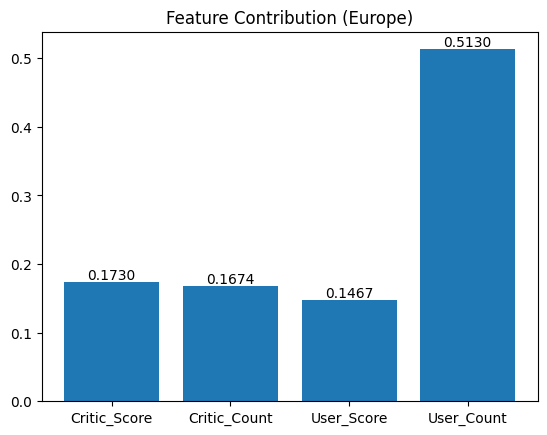

In [65]:
# Create the bar plot
plt.bar(col1, list(model1.feature_importances_))
plt.title("Feature Contribution (Europe)")

# Add values to the bars
for i, coef in enumerate(model1.feature_importances_):
    plt.text(i, coef, f'{coef:.4f}', ha='center', va='bottom')
plt.savefig('EU sales.png')
plt.show()


#### Japan

In [66]:
japan = sale_drop['JP_Sales']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data2,japan,test_size= 0.2, random_state = 42, shuffle = True)
# # Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# # Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# # Transform your test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [68]:
# Linear Regression model traning
model2 = RandomForestRegressor(n_estimators=150)

model2.fit(X_train , y_train)


#predictions on the test data
predictions = model2.predict(X_test)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)



print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.05328315641693918


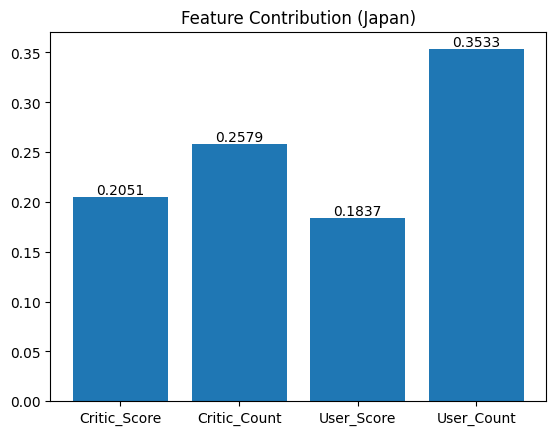

In [69]:
# Create the bar plot
plt.bar(col1, list(model2.feature_importances_))
plt.title("Feature Contribution (Japan)")

# Add values to the bars
for i, coef in enumerate(model2.feature_importances_):
    plt.text(i, coef, f'{coef:.4f}', ha='center', va='bottom')
plt.savefig('Japan sales.png')
plt.show()

## Q4

In [38]:
sale.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [39]:
#Categorical variables

cat = ['Platform','Genre', 'Publisher','Developer', 'Rating']

In [40]:
platform = sale_dro['Platform']

X_platform = sale_dro.drop(columns = ['Platform'])

#### Platform

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_platform,platform,test_size= 0.2, random_state = 42, shuffle = True)
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# # Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# # Transform your test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


forest = RandomForestClassifier(random_state=1)

forest.fit(X_train_scaled, y_train)
predictions = forest.predict(X_test_scaled)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)
# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)

print("Confusion Matrix:")
print(confusion)
print("\nAccuracy:", accuracy)
print("Classification report (Platform):")
print(classification_report_str)


Confusion Matrix:
[[158   5   6   0  15   4  10  47   6   1]
 [  4  61   0   0  17   0   0   1   0  11]
 [ 10   0 133   0   4   4   0   0   2   2]
 [  0   1   0   0   7   0   0   0   0   0]
 [ 17  18   3   0 165   6  14  28   8  26]
 [  6   0   6   0   4  91   3  13  64   0]
 [ 36   1   2   0  28   9  32  12   2   1]
 [ 71   0   1   0   1  13  10  59  17   0]
 [  9   0   7   0   5  74   5  26  91   1]
 [  1  11   3   0  62   0   6   1   1  65]]

Accuracy: 0.5200729927007299
Classification report (Platform):
              precision    recall  f1-score   support

           0       0.51      0.63      0.56       252
           1       0.63      0.65      0.64        94
           2       0.83      0.86      0.84       155
           3       0.00      0.00      0.00         8
           4       0.54      0.58      0.56       285
           5       0.45      0.49      0.47       187
           6       0.40      0.26      0.32       123
           7       0.32      0.34      0.33       172


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(forest, X_train, y_train, scoring=scoring)
sorted(scores.keys())
scores['test_recall_macro']

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.46298633, 0.44692227, 0.45706769, 0.47591643, 0.45691106])

#### Genre

In [47]:
genre = sale_dro['Genre']
X_genre = sale_dro.drop(columns = ['Genre'])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_genre,genre,test_size= 0.2, random_state = 42, shuffle = True)
# # Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# # Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# # Transform your test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [49]:

forest = RandomForestClassifier(random_state=1)

forest.fit(X_train_scaled, y_train)
predictions = forest.predict(X_test_scaled)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)
# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)

print("Confusion Matrix:")
print(confusion)
print("\nAccuracy:", accuracy)
print("Classification report (Genre):")
print(classification_report_str)

Confusion Matrix:
[[240   0   5   3   9   3  12  12  29  10  23   6]
 [ 37   5   0   7   3   5   0   8   3   6  10   3]
 [ 19   0  30   1   1   0   2  10   3   0   3   0]
 [ 15   6   2  70   5   5  10   1   5  12  25   0]
 [ 27   2   0   2  22   2   5   2   2   3  14   1]
 [  9   2   0  12   2  13   3   3   2   5  10   1]
 [ 34   0   2   8   4   5  55   3   3   1  42   0]
 [ 34   1   3   2   6   1   1  49   8   1   5   2]
 [ 59   0   4   1   0   0   2   7  84   4   8   6]
 [ 21   5   2  13   2   6   4   5   1  25   9   4]
 [ 19   1   1  14   4   3  11   2   6   4 165   2]
 [ 18   3   2   1   1   0   1   9   3   2   3  19]]

Accuracy: 0.4726277372262774
Classification report (Genre):
              precision    recall  f1-score   support

           0       0.45      0.68      0.54       352
           1       0.20      0.06      0.09        87
           2       0.59      0.43      0.50        69
           3       0.52      0.45      0.48       156
           4       0.37      0.27    

In [50]:
#Cross validation for the Genre
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(forest, X_train, y_train, scoring=scoring)
sorted(scores.keys())
scores['test_recall_macro']

array([0.37038226, 0.38299685, 0.36738385, 0.36753091, 0.36951997])

#### Rating

In [53]:
rating = sale_dro['Rating']
X_rating = sale_dro.drop(columns = ['Rating'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_rating,rating,test_size= 0.2, random_state = 42, shuffle = True)
# # Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# # Fit the scaler to your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# # Transform your test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [55]:
forest = RandomForestClassifier(random_state=1)

forest.fit(X_train_scaled, y_train)
predictions = forest.predict(X_test_scaled)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)
# Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)

print("Confusion Matrix:")
print(confusion)
print("\nAccuracy:", accuracy)
print("Classification report (Rating):")
print(classification_report_str)

Confusion Matrix:
[[580  17   4  60]
 [ 94  91   6  45]
 [ 10   4 171  85]
 [ 84  31  49 313]]

Accuracy: 0.7025547445255474
Classification report (Rating):
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       661
           1       0.64      0.39      0.48       236
           2       0.74      0.63      0.68       270
           3       0.62      0.66      0.64       477

    accuracy                           0.70      1644
   macro avg       0.69      0.64      0.65      1644
weighted avg       0.70      0.70      0.69      1644



In [58]:
#Cross validation for the Rating model
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(forest, X_train, y_train, scoring=scoring)
sorted(scores.keys())
scores['test_recall_macro']

array([0.61774979, 0.6156174 , 0.60599099, 0.59963749, 0.58468435])

### Unsupervised Learning

In [62]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg

import cv2
from sklearn.cluster import KMeans
import seaborn as sn
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score,adjusted_rand_score, v_measure_score, adjusted_mutual_info_score,adjusted_rand_score, davies_bouldin_score
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [63]:
col = ['Year_of_Release', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

X_rating.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
       'Developer'],
      dtype='object')

In [65]:
X_rating_c = X_rating[col]

In [66]:
X_rating_c

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,5,82.53,76.0,51.0,8,322.0
1,7,35.52,82.0,73.0,8.3,709.0
2,8,32.77,80.0,73.0,8,192.0
3,5,29.80,89.0,65.0,8.5,431.0
4,5,28.92,58.0,41.0,6.6,129.0
...,...,...,...,...,...,...
8214,10,0.01,61.0,12.0,5.8,43.0
8215,7,0.01,48.0,10.0,7.5,23.0
8216,10,0.01,60.0,12.0,7.2,13.0
8217,7,0.01,70.0,22.0,7.5,23.0


In [127]:
scaler =StandardScaler()#standardization of data
X_rating_c_std = scaler.fit_transform(X_rating_c)

In [132]:
model = PCA(5) #PCA for mfeat-pix
X_rating_c_t=model.fit_transform(X_rating_c_std)
X_rating_c_t
X_rating_c_tr = X_rating_c_t[:,0:5]

In [133]:
feature =range(model.n_components_)
explained_variance = pd.DataFrame(model.explained_variance_, columns =['Explained_var'])
explained_var_ratio = pd.DataFrame(model.explained_variance_ratio_, columns =['Explained_var'])
variance_df = pd.concat([explained_variance,explained_var_ratio],axis=1, join='inner')
#variance_df.sort_values(by=['explained_var_ratio'],ascending= False, inplace=True)
variance_df.head(10)
# variance_df[0:5].sum()

,Explained_var,Explained_var
0,2.08,0.35
1,1.36,0.23
2,0.89,0.15
3,0.69,0.11
4,0.58,0.10


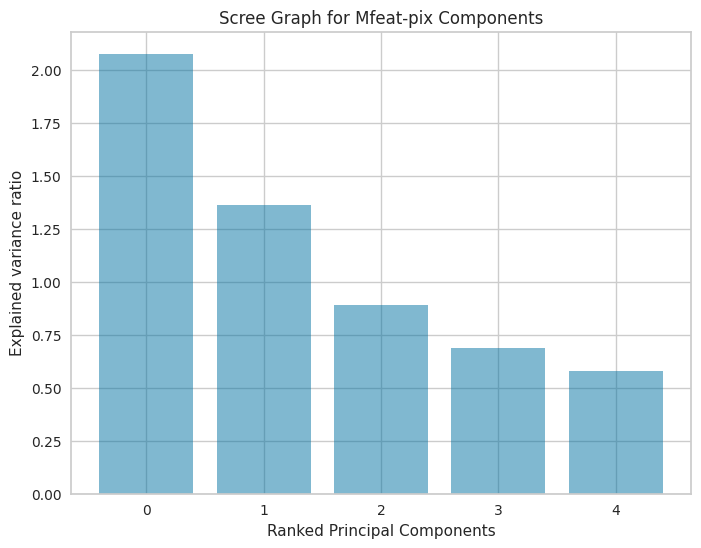

In [134]:
plt.figure(figsize = (8, 6))
plt.bar(feature,model.explained_variance_, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Ranked Principal Components')
plt.title("Scree Graph for Mfeat-pix Components")
plt.show()

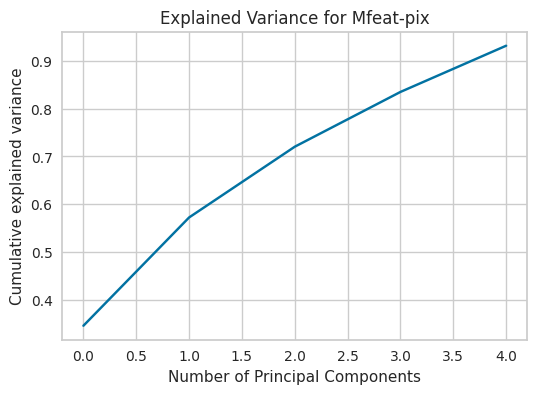

In [135]:
fig = plt.figure(figsize=(6,4))#plot for cummulative explained variance
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance for Mfeat-pix')
plt.show()

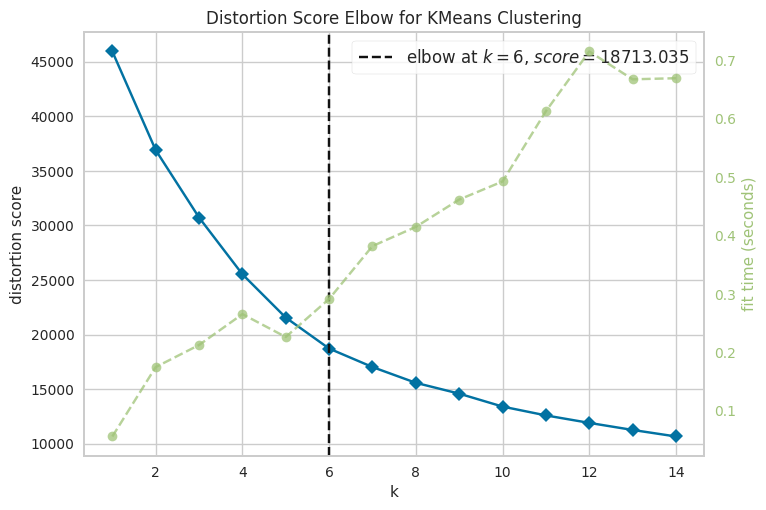

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [136]:
model15 =KMeans()
elbow1 = KElbowVisualizer(model15,k=(1,15)).fit(X_rating_c_tr)
elbow1.show()

### Platform

In [137]:
#Using 10 clusters 
model1 = KMeans(n_clusters=10,random_state = 42, max_iter=300, n_init=10)#KMean model for Mfeat-pix
cluster1= model1.fit_predict(X_rating_c_tr)
model1.labels_

array([6, 2, 2, ..., 0, 0, 1], dtype=int32)

In [138]:
centroids = model1.cluster_centers_
model1.inertia_

13401.373995985186

In [139]:
silhouette_score(X_rating_c_tr,model1.labels_,metric = 'euclidean')

0.2738142048742837

In [140]:
rand = adjusted_rand_score(platform,model1.labels_ )
rand

0.11818259634296387

#### Genre cluster

In [101]:
X_genre_c = X_genre[col]

In [102]:
scaler =StandardScaler()#standardization of data
X_genre_c_std = scaler.fit_transform(X_genre_c)

In [103]:
#PCA
model = PCA(2) #PCA for mfeat-pix
X_genre_c_t=model.fit_transform(X_genre_c_std)
X_genre_c_t
X_genre_c_tr = X_genre_c_t[:,0:10]

In [104]:
feature =range(model.n_components_)
explained_variance = pd.DataFrame(model.explained_variance_, columns =['Explained_var'])
explained_var_ratio = pd.DataFrame(model.explained_variance_ratio_, columns =['Explained_var'])
variance_df = pd.concat([explained_variance,explained_var_ratio],axis=1, join='inner')
#variance_df.sort_values(by=['explained_var_ratio'],ascending= False, inplace=True)
variance_df.head(10)
# variance_df[0:5].sum()

,Explained_var,Explained_var
0,2.08,0.35
1,1.36,0.23


In [105]:
model1 = KMeans(n_clusters=12,random_state = 42, max_iter=300, n_init=10)#KMean model for Mfeat-pix
cluster1= model1.fit_predict(X_genre_c_tr)
model1.labels_

array([4, 4, 4, ..., 7, 6, 7], dtype=int32)

In [106]:
# Silhouette score

centroids = model1.cluster_centers_
model1.inertia_
silhouette_score(X_genre_c_tr,model1.labels_,metric = 'euclidean')

0.3585887188301748

In [107]:
rand = adjusted_rand_score(genre,model1.labels_ )
rand

0.00795292077942116

### Rating

In [67]:
#PCA
scaler =StandardScaler()#standardization of data
X_rating_c_std = scaler.fit_transform(X_rating_c)
model = PCA(2) #PCA for mfeat-pix
X_rating_c_t=model.fit_transform(X_rating_c_std)
X_rating_c_t
X_rating_c_tr = X_rating_c_t[:,0:2]

In [68]:
feature =range(model.n_components_)
explained_variance = pd.DataFrame(model.explained_variance_, columns =['Explained_var'])
explained_var_ratio = pd.DataFrame(model.explained_variance_ratio_, columns =['Explained_per'])
variance_df = pd.concat([explained_variance,explained_var_ratio],axis=1, join='inner')

variance_df.head(10)

,Explained_var,Explained_per
0,2.075043,0.345798
1,1.359453,0.226548


In [69]:
model1 = KMeans(n_clusters=4,random_state = 42, max_iter=300, n_init=10)#KMean model for Mfeat-pix
cluster1= model1.fit_predict(X_rating_c_tr)
model1.labels_

array([3, 3, 3, ..., 2, 1, 2], dtype=int32)

In [70]:
centroids = model1.cluster_centers_
model1.inertia_

10572.235524560747

In [71]:
# Silhouette score
silhouette_score(X_rating_c_tr,model1.labels_,metric = 'euclidean')

0.3689233424791362

In [72]:
rand = adjusted_rand_score(rating,model1.labels_ )
rand

0.08495777771909929

# COMPONENT THREE (Handwritten Digits Recognition)

In [2]:
#Library importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from tensorflow import keras
from tensorflow.keras.datasets import mnist

import matplotlib.image as mpimg
%matplotlib inline

from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

sns.set(style='white', context='notebook', palette='deep')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

from tensorflow.python.client import device_lib

device_lib.list_local_devices()

Name: /physical_device:GPU:0   Type: GPU


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17989339436376507438
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16059727872
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2346033117366354304
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


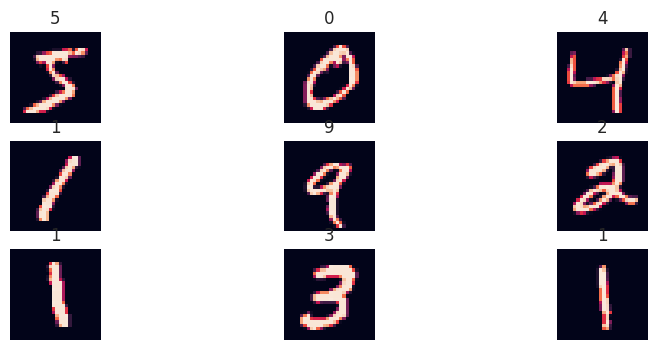

In [5]:
#Plot the first 9 images
fig, ax = plt.subplots(3,3,figsize= (10,4))

for i in range(9):
    ax[i // 3, i % 3].imshow(X_train[i])
    ax[i // 3, i % 3].set_title(y_train[i])
    ax[i // 3, i % 3].axis('off')
plt.show()

In [6]:
#Normalization

X_train = X_train/255.0
X_test = X_test/255.

In [7]:
X_train[0].shape

(28, 28)

In [8]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Instance of ImageDataGenerator with desired augmentation settings
train_datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift width by up to 20% of the image width
    height_shift_range=0.2,  # Shift height by up to 20% of the image height
    shear_range=0.2,  # Shear angle in counter-clockwise direction
    zoom_range=0.2,  # Randomly zoom in by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip = False
)

In [10]:
# Encode labels to one hot vectors
y_train = to_categorical(y_train, num_classes = 10)


In [11]:
# Split the train and the validation set for the fitting
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

In [12]:
train_datagen.fit(X_train)

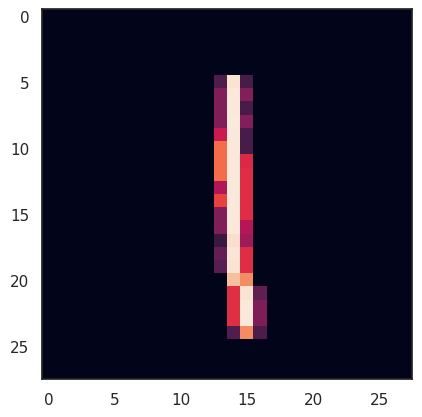

In [13]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [14]:
X_train[0].shape

(28, 28, 1)

#### No regularization

In [82]:
# Set the CNN model 
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 3, 3, 64)        

In [48]:
# Compile the model
model.compile(optimizer = SGD(lr=0.001, momentum=0.9, decay=0.0) , loss = "categorical_crossentropy", metrics=["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
epochs = 10 
batch_size = 32

In [50]:
# Fit the model
history = model.fit(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val))

Epoch 1/10
1688/1688 [==============================] - 23s 13ms/step - loss: 1.9317 - accuracy: 0.3348 - val_loss: 0.7102 - val_accuracy: 0.7667
Epoch 2/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.8036 - accuracy: 0.7346 - val_loss: 0.3781 - val_accuracy: 0.8842
Epoch 3/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.5732 - accuracy: 0.8133 - val_loss: 0.2792 - val_accuracy: 0.9107
Epoch 4/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.4637 - accuracy: 0.8505 - val_loss: 0.1841 - val_accuracy: 0.9450
Epoch 5/10
1688/1688 [==============================] - 23s 13ms/step - loss: 0.3868 - accuracy: 0.8760 - val_loss: 0.1583 - val_accuracy: 0.9533
Epoch 6/10
1688/1688 [==============================] - 23s 13ms/step - loss: 0.3375 - accuracy: 0.8932 - val_loss: 0.1423 - val_accuracy: 0.9558
Epoch 7/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.2981 - accuracy: 0.9073 - val_loss: 0.1271 -

### Test Model

In [51]:
y_pred = np.argmax(model.predict(X_test), axis = -1)



from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.93      0.95      0.94      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.99      0.99       982
           5       0.95      0.93      0.94       892
           6       0.98      0.97      0.97       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



#### L1 Regularization

In [17]:
from keras import regularizers

In [84]:
# Set the CNN model 

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1) ,kernel_regularizer=regularizers.l1(0.0001)))

model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu',kernel_regularizer=regularizers.l1(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu',kernel_regularizer=regularizers.l1(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [85]:
# Compile the model
model.compile(optimizer = SGD(lr=0.001, momentum=0.9, decay=0.0) , loss = "categorical_crossentropy", metrics=["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [86]:
# Fit the model
history = model.fit(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val))

Epoch 1/10
1688/1688 [==============================] - 24s 14ms/step - loss: 1.9853 - accuracy: 0.3827 - val_loss: 0.7716 - val_accuracy: 0.8288
Epoch 2/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.9862 - accuracy: 0.7411 - val_loss: 0.5548 - val_accuracy: 0.8885
Epoch 3/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.7677 - accuracy: 0.8167 - val_loss: 0.4790 - val_accuracy: 0.9128
Epoch 4/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.6541 - accuracy: 0.8545 - val_loss: 0.3841 - val_accuracy: 0.9418
Epoch 5/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.5859 - accuracy: 0.8762 - val_loss: 0.3782 - val_accuracy: 0.9448
Epoch 6/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.5246 - accuracy: 0.8954 - val_loss: 0.3413 - val_accuracy: 0.9488
Epoch 7/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.4825 - accuracy: 0.9068 - val_loss: 0.3089 -

In [87]:
y_pred = np.argmax(model.predict(X_test), axis = -1)




from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.94      0.95      1032
           3       0.96      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.93      0.96      0.95       892
           6       0.98      0.96      0.97       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### L2 regularization

In [88]:
# Set the CNN model 

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1) ,kernel_regularizer=regularizers.l2(0.0001)))

model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

In [89]:
# Compile the model
model.compile(optimizer = SGD(lr=0.001, momentum=0.9, decay=0.0) , loss = "categorical_crossentropy", metrics=["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [90]:
# Fit the model
history = model.fit(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val))

Epoch 1/10
1688/1688 [==============================] - 23s 14ms/step - loss: 1.8904 - accuracy: 0.3527 - val_loss: 0.7044 - val_accuracy: 0.7692
Epoch 2/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.8218 - accuracy: 0.7308 - val_loss: 0.3820 - val_accuracy: 0.8833
Epoch 3/10
1688/1688 [==============================] - 23s 13ms/step - loss: 0.5866 - accuracy: 0.8140 - val_loss: 0.2538 - val_accuracy: 0.9277
Epoch 4/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.4842 - accuracy: 0.8487 - val_loss: 0.2158 - val_accuracy: 0.9393
Epoch 5/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.4149 - accuracy: 0.8719 - val_loss: 0.1902 - val_accuracy: 0.9458
Epoch 6/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.3623 - accuracy: 0.8903 - val_loss: 0.1739 - val_accuracy: 0.9512
Epoch 7/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.3245 - accuracy: 0.9024 - val_loss: 0.1543 -

In [91]:
y_pred = np.argmax(model.predict(X_test), axis = -1)




from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.94      0.94      0.94      1032
           3       0.92      1.00      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.94      0.94      0.94       892
           6       0.98      0.94      0.96       958
           7       0.96      0.97      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



### Dropout

In [18]:
# Set the CNN model 

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1) ,kernel_regularizer=regularizers.l2(0.0001)))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [19]:
# Compile the model
model.compile(optimizer = SGD(lr=0.001, momentum=0.9, decay=0.0) , loss = "categorical_crossentropy", metrics=["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
# Fit the model
history = model.fit(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val))

Epoch 1/10


2023-09-10 14:18:39.447894: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1688/1688 [==============================] - 31s 15ms/step - loss: 2.2342 - accuracy: 0.1792 - val_loss: 1.7275 - val_accuracy: 0.5280
Epoch 2/10
1688/1688 [==============================] - 23s 14ms/step - loss: 1.7425 - accuracy: 0.3722 - val_loss: 0.9326 - val_accuracy: 0.7338
Epoch 3/10
1688/1688 [==============================] - 24s 14ms/step - loss: 1.3223 - accuracy: 0.5434 - val_loss: 0.6236 - val_accuracy: 0.8318
Epoch 4/10
1688/1688 [==============================] - 24s 14ms/step - loss: 1.0817 - accuracy: 0.6325 - val_loss: 0.4778 - val_accuracy: 0.8545
Epoch 5/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.9425 - accuracy: 0.6857 - val_loss: 0.4083 - val_accuracy: 0.8682
Epoch 6/10
1688/1688 [==============================] - 23s 13ms/step - loss: 0.8422 - accuracy: 0.7211 - val_loss: 0.3480 - val_accuracy: 0.8897
Epoch 7/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.7750 - accuracy: 0.7454 - val_loss: 0.3178 - val_accura

In [21]:
y_pred = np.argmax(model.predict(X_test), axis = -1)




from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.88      0.91      1032
           3       0.87      0.89      0.88      1010
           4       0.99      0.96      0.97       982
           5       0.87      0.87      0.87       892
           6       0.93      0.97      0.95       958
           7       0.97      0.95      0.96      1028
           8       0.94      0.96      0.95       974
           9       0.93      0.94      0.94      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



### Droping convolution layers

In [35]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

In [36]:
# Compile the model
model.compile(optimizer = SGD(learning_rate=0.001, momentum=0.9, decay=0.0) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [37]:
# Fit the model
history = model.fit(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val))

Epoch 1/10
1688/1688 [==============================] - 22s 13ms/step - loss: 1.7262 - accuracy: 0.3953 - val_loss: 0.7394 - val_accuracy: 0.7563
Epoch 2/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.8358 - accuracy: 0.7208 - val_loss: 0.4675 - val_accuracy: 0.8355
Epoch 3/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.6259 - accuracy: 0.7945 - val_loss: 0.3461 - val_accuracy: 0.8868
Epoch 4/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.5213 - accuracy: 0.8295 - val_loss: 0.2872 - val_accuracy: 0.9043
Epoch 5/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.4558 - accuracy: 0.8529 - val_loss: 0.2385 - val_accuracy: 0.9240
Epoch 6/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.4124 - accuracy: 0.8684 - val_loss: 0.2077 - val_accuracy: 0.9333
Epoch 7/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.3754 - accuracy: 0.8799 - val_loss: 0.2093 -

In [38]:
y_pred = np.argmax(model.predict(X_test), axis = -1)




from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.89      0.95      0.92      1032
           3       0.94      0.95      0.94      1010
           4       0.99      0.97      0.98       982
           5       0.91      0.89      0.90       892
           6       0.98      0.94      0.96       958
           7       0.95      0.97      0.96      1028
           8       0.95      0.98      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### Learning rate

In [30]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(256, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

In [21]:
# Compile the model
model.compile(optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [22]:
# Fit the model
history = model.fit(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val))

Epoch 1/10
1688/1688 [==============================] - 30s 14ms/step - loss: 0.8118 - accuracy: 0.7227 - val_loss: 0.1400 - val_accuracy: 0.9565
Epoch 2/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.2800 - accuracy: 0.9137 - val_loss: 0.1042 - val_accuracy: 0.9653
Epoch 3/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.2017 - accuracy: 0.9357 - val_loss: 0.0761 - val_accuracy: 0.9757
Epoch 4/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.1650 - accuracy: 0.9475 - val_loss: 0.0802 - val_accuracy: 0.9758
Epoch 5/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.1484 - accuracy: 0.9531 - val_loss: 0.0897 - val_accuracy: 0.9717
Epoch 6/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.1340 - accuracy: 0.9581 - val_loss: 0.0590 - val_accuracy: 0.9820
Epoch 7/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1245 - accuracy: 0.9619 - val_loss: 0.0621 -

In [23]:
y_pred = np.argmax(model.predict(X_test), axis = -1)




from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.95      0.97      0.96      1032
           3       0.97      1.00      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.93      0.96       892
           6       0.99      0.97      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [28]:
# Compile the model
model.compile(optimizer = SGD(lr=0.1, momentum=0.9, decay=0.0) , loss = "categorical_crossentropy", metrics=["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
# Fit the model
history = model.fit(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val))

Epoch 1/10
1688/1688 [==============================] - 24s 14ms/step - loss: 1.5558 - accuracy: 0.4830 - val_loss: 2.3316 - val_accuracy: 0.1090
Epoch 2/10
1688/1688 [==============================] - 24s 14ms/step - loss: 2.3082 - accuracy: 0.1043 - val_loss: 2.3115 - val_accuracy: 0.0967
Epoch 3/10
1688/1688 [==============================] - 23s 14ms/step - loss: 2.3077 - accuracy: 0.1048 - val_loss: 2.3096 - val_accuracy: 0.0982
Epoch 4/10
1688/1688 [==============================] - 22s 13ms/step - loss: 2.3078 - accuracy: 0.1050 - val_loss: 2.3098 - val_accuracy: 0.0953
Epoch 5/10
1688/1688 [==============================] - 23s 14ms/step - loss: 2.3078 - accuracy: 0.1036 - val_loss: 2.3126 - val_accuracy: 0.1055
Epoch 6/10
1688/1688 [==============================] - 22s 13ms/step - loss: 2.3085 - accuracy: 0.1043 - val_loss: 2.3200 - val_accuracy: 0.1053
Epoch 7/10
1688/1688 [==============================] - 22s 13ms/step - loss: 2.3086 - accuracy: 0.1042 - val_loss: 2.3058 -

In [26]:
y_pred = np.argmax(model.predict(X_test), axis = -1)




from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Compile the model
model.compile(optimizer = SGD(lr=0.0001, momentum=0.9, decay=0.0) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [32]:
# Fit the model
history = model.fit(train_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val))

Epoch 1/10
1688/1688 [==============================] - 23s 13ms/step - loss: 2.2982 - accuracy: 0.1236 - val_loss: 2.2759 - val_accuracy: 0.1697
Epoch 2/10
1688/1688 [==============================] - 22s 13ms/step - loss: 2.2768 - accuracy: 0.2030 - val_loss: 2.2383 - val_accuracy: 0.2677
Epoch 3/10
1688/1688 [==============================] - 23s 13ms/step - loss: 2.2399 - accuracy: 0.2529 - val_loss: 2.1452 - val_accuracy: 0.4288
Epoch 4/10
1688/1688 [==============================] - 22s 13ms/step - loss: 2.1358 - accuracy: 0.3098 - val_loss: 1.8338 - val_accuracy: 0.5007
Epoch 5/10
1688/1688 [==============================] - 23s 13ms/step - loss: 1.8690 - accuracy: 0.3696 - val_loss: 1.3069 - val_accuracy: 0.6473
Epoch 6/10
1688/1688 [==============================] - 23s 14ms/step - loss: 1.5854 - accuracy: 0.4585 - val_loss: 1.0088 - val_accuracy: 0.7282
Epoch 7/10
1688/1688 [==============================] - 22s 13ms/step - loss: 1.2925 - accuracy: 0.5714 - val_loss: 0.7374 -

In [33]:
y_pred = np.argmax(model.predict(X_test), axis = -1)


from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       980
           1       0.96      0.99      0.97      1135
           2       0.87      0.87      0.87      1032
           3       0.72      0.79      0.75      1010
           4       0.97      0.87      0.92       982
           5       0.70      0.73      0.72       892
           6       0.88      0.89      0.88       958
           7       0.84      0.88      0.86      1028
           8       0.84      0.84      0.84       974
           9       0.88      0.84      0.86      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

